In [46]:
# Download WiderPerson Dataset
!gdown https://drive.google.com/u/0/uc?id=1I7OjhaomWqd8Quf7o5suwLloRlY0THbp&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1I7OjhaomWqd8Quf7o5suwLloRlY0THbp
To: /content/WiderPerson.zip
100% 1.02G/1.02G [00:02<00:00, 380MB/s]


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
# Make Directory for DataSet Extraction
!mkdir /content/drive/MyDrive/Human_Detection/widerperson_Dataset

mkdir: cannot create directory ‘/content/drive/MyDrive/Human_Detection/widerperson_Dataset’: File exists


In [48]:
!ls /content/drive/MyDrive/Human_Detection/widerperson_Dataset

In [49]:
# Unzip dataset to Dataset folder
!unzip -qx WiderPerson.zip -d /content/drive/MyDrive/Human_Detection/widerperson_Dataset

In [50]:
%cd drive/MyDrive/Human_Detection/

/content/drive/MyDrive/Human_Detection


In [51]:
!pwd

/content/drive/MyDrive/Human_Detection


In [52]:
!ls

'Dataset Preparation+Yolov5m_Training.ipynb'   widerperson_Dataset   yolov5


In [53]:
import cv2 as cv
import shutil
import matplotlib.pyplot as plt
import os
from glob import glob

In [54]:
imges_dir = "./dataset/images"
label_dir = "./dataset/labels"

In [55]:
os.makedirs(imges_dir,exist_ok=True)
os.makedirs(label_dir,exist_ok=True)

# Training_dataset_preparation

In [56]:
train_imgs_dir = imges_dir+"/"+"train/"
train_lbl_dir = label_dir+"/"+"train/"


In [57]:
os.makedirs(train_imgs_dir,exist_ok=True)
os.makedirs(train_lbl_dir,exist_ok=True)

In [58]:
def resize_img(im , target_width = 640):
    h,w,_  = im.shape
    target_height = int(h / w * target_width)
    im = cv.resize(im , (target_width , target_height), interpolation = cv.INTER_AREA)
    return im

In [59]:
with open("./widerperson_Dataset/train.txt") as f:
    file_names = f.readlines()
    for name in file_names:
        name = name.strip()
        img = cv.imread("./widerperson_Dataset/Images/"+name+".jpg")
        img_h,img_w,_ = img.shape

        with open("./widerperson_Dataset/Annotations/"+name+".jpg.txt") as fr:
            labels = fr.readlines()
            flag = False
            with open(train_lbl_dir+name+".txt",mode='w') as fw:
                for rect in labels[1:]:
                    cls,x1,y1,x2,y2 = rect.strip().split(" ")
                    cls,x1,y1,x2,y2 = int(cls),int(x1),int(y1),int(x2),int(y2)
                    if(cls == 1 or cls == 2 or cls == 3):
                        w = abs(x2-x1)
                        h = abs(y1-y2)
                        cx = (x1+w/2)/img_w
                        cy = (y1+h/2)/img_h
                        w = w / img_w
                        h = h / img_h
                        yolo_line = f'{0} {cx} {cy} {w} {h}\n'
                        fw.write(yolo_line)
        cv.imwrite(train_imgs_dir+name+".jpg", resize_img(img))

# Validation Data Preparation

In [60]:
imgs_dir = imges_dir+"/"+"val/"
lbl_dir = label_dir+"/"+"val/"

In [61]:
os.makedirs(imgs_dir,exist_ok=True)
os.makedirs(lbl_dir,exist_ok=True)

In [62]:
with open("./widerperson_Dataset/val.txt") as f:
    file_names = f.readlines()
    for name in file_names:
        name = name.strip()
        img = cv.imread("./widerperson_Dataset/Images/"+name+".jpg")
        img_h,img_w,_ = img.shape

        with open("./widerperson_Dataset/Annotations/"+name+".jpg.txt") as fr:
            labels = fr.readlines()
            flag = False
            with open(lbl_dir+name+".txt",mode='w') as fw:
                for rect in labels[1:]:
                    cls,x1,y1,x2,y2 = rect.strip().split(" ")
                    cls,x1,y1,x2,y2 = int(cls),int(x1),int(y1),int(x2),int(y2)
                    if(cls == 1 or cls == 2 or cls == 3):
                        w = abs(x2-x1)
                        h = abs(y1-y2)
                        cx = (x1+w/2)/img_w
                        cy = (y1+h/2)/img_h
                        w = w / img_w
                        h = h / img_h
                        yolo_line = f'{0} {cx} {cy} {w} {h}\n'
                        fw.write(yolo_line)
        cv.imwrite(imgs_dir+name+".jpg", resize_img(img))

# Display Image

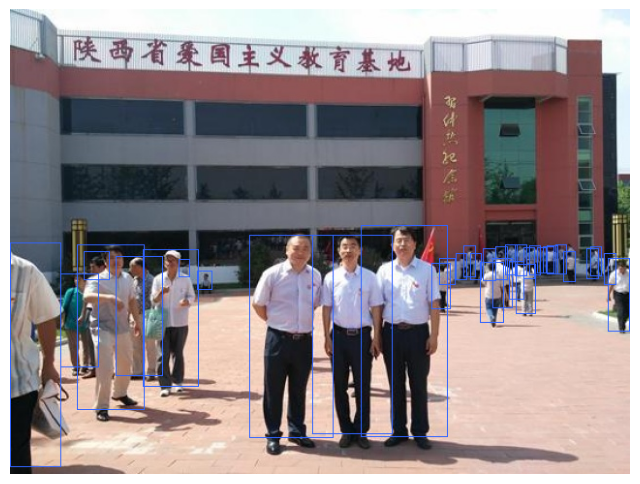

In [63]:
with open("./dataset/labels/train/000040.txt") as f:
    bboxes = f.readlines()
    # print(bboxes)
    img = cv.imread("./dataset/images/train/000040.jpg")
    img_h,img_w,_ = img.shape
    for rect in bboxes:
        cls,cx,cy,w,h = rect.strip().split(" ")
        # print(cls,cx,cy,w,h )
        cx = int(float(cx)*img_w)
        cy = int(float(cy)*img_h)
        w = int(float(w)*img_w)
        h = int(float(h)*img_h)
        color = (255,100,50)

        cv.rectangle(img , (int(cx-w/2), int(cy-h/2)), (int(cx+w/2), int(cy+h/2)), color , 1)


    plt.figure(figsize = (8,8))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

# Training Yolo

In [64]:
import torch
from IPython.display import clear_output
torch.cuda.get_device_name()

'Tesla V100-SXM2-16GB'

In [65]:
!git clone https://github.com/ultralytics/yolov5.git
!pip install -qr ./yolov5/requirements.txt


In [66]:
%cd yolov5

/content/drive/MyDrive/Human_Detection/yolov5


In [67]:
!ls

'7acc87ed-9e1f-4d4a-8bdc-0912393948df?X-Amz-Algorithm=AWS4-HMAC-SHA256'   README.md
 benchmarks.py								  README.zh-CN.md
 CITATION.cff								  requirements.txt
 classify								  runs
 CONTRIBUTING.md							  segment
 data									  setup.cfg
 detect.py								  train.py
 export.py								  tutorial.ipynb
 hubconf.py								  utils
 LICENSE								  val.py
 models									  yolov5m.pt
 __pycache__


In [68]:
%pwd

'/content/drive/MyDrive/Human_Detection/yolov5'

In [ ]:
clear_output()
f = open('./data/dataset.yaml', 'w')
f.write('train: /content/drive/MyDrive/Human_Detection/dataset/images/train')
f.write('\nval: /content/drive/MyDrive/Human_Detection/dataset/images/val')
f.write('\nnc: {}'.format(1))
f.write("\nnames: ['Human']")

f.close()

In [ ]:
!gdown https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m.pt

Downloading...
From: https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m.pt
To: /content/drive/MyDrive/Human_Detection/yolov5/yolov5m.pt
100% 42.8M/42.8M [00:00<00:00, 73.9MB/s]


In [72]:
!python train.py --img 640 --batch 32 --workers 8 --epochs 65\
  --weights yolov5m.pt\
  --cfg /content/drive/MyDrive/Human_Detection/yolov5/models/yolov5m.yaml\
  --data /content/drive/MyDrive/Human_Detection/yolov5/data/dataset.yaml\
  --weights yolov5m\
  --resume


2023-11-30 05:16:18.315630: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 05:16:18.315685: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 05:16:18.315712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m, cfg=/content/drive/MyDrive/Human_Detection/yolov5/models/yolov5m.yaml, data=/content/drive/MyDrive/Human_Detection/yolov5/data/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=65, batch_size=32, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, ima